# Bike Share Assignment - Response
BY - Kumar Kanishka

### Problem Statement

In this assignment, I will build a multiple linear regression model to predict the demand for shared bikes and submit a Jupyter notebook for the same.

BoomBikes, a US bike-sharing provider, has recently suffered considerable dips in their revenues due to the ongoing COVID-19 pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to accelerate its revenue as soon as the ongoing lockdown ends and the economy restores to a healthy state.

BoomBikes aspires to understand the demand for shared bikes among the people after the quarantine situation ends across the nation. They aim to prepare themselves to cater to the people's needs once the situation gets better, stand out from other service providers, and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. I will analyze this data to identify the key factors influencing bike demand and build a predictive model accordingly.

## Disabling Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Importing Required Libraries

In [2]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# importing data visualization tools 
import matplotlib.pyplot as plt
import seaborn as sns

# importing linear regression libraries and methods
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading and analysing the database

In [3]:
# reading the csv file into a dataframe
df=pd.read_csv('day.csv')

In [4]:
# finding the number of rows and columns in the dataframe
df.shape

(730, 16)

In [5]:
# understanding the column structure in the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the types of variables and if any columns have null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking if the dataset has any missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no missing values in the dataframe

In [8]:
# describing the data in all columns of the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping columns not required for the analysis

#### Creating a new column to capture days since start of the study

In [9]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'], format= '%d-%m-%Y')

# Creating the variables required to fill the column to capture days since start of study
from datetime import date

d0 = pd.Timestamp('2017-12-31 00:00:00', tz=None)
d1 = df.dteday

# Creating the column day to capture this information
delta = d1 - d0
df['day']= delta

# Checking the dataframe to see the newly created column
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1 days
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2 days
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3 days
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4 days
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5 days


In [10]:
# Cleaning days to show integer values
df['day'] = df['day'].astype(str)
df['day'] = df['day'].map(lambda x: x[0:2] if len(x)<8 else x[0:3])
df['day'] = df['day'].astype(int)

# Checking the day column again
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


#### Dropping the instant, dteday, casual and registered columns

In [11]:
# Creating a variable to store the names of columns to be dropped

dropcol = ['instant', 'dteday', 'casual', 'registered']

# Using the variable to drop the selected columns

df.drop(dropcol, axis=1, inplace=True)

In [12]:
# Checking the dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


## Mapping the categorical variables to correct categories

#### Season

In [13]:
# mapping the values of season variable as per the data dictionary
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
# checking if the values have been correctly mapped
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

#### Weather Situation

In [14]:
# mapping the values of season variable as per the data dictionary
df.weathersit = df.weathersit.map({1:'clear',2:'misty',3:'light_rain',4:'heavy_rain'})
# checking if the values have been conrrectly mapped
df.weathersit.value_counts()

weathersit
clear         463
misty         246
light_rain     21
Name: count, dtype: int64

Point to note
- There are no days captured with heavy rain

#### Month

In [15]:
# mapping the values of mnth variable as per the data dictionary
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# checking if the values have been correctly mapped
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,jan,0,1,1,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,2,1,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,jan,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,jan,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,jan,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


#### Weekday

In [16]:
# mapping the values of weekday variable as per the data dictionary
df.weekday = df.weekday.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})
# checking if the values have been correctly mapped
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


## Exploratory Data Analysis

### Univariate Analysis

### Checking the distribution of the target variable

In [17]:
# describing the target variable
df.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

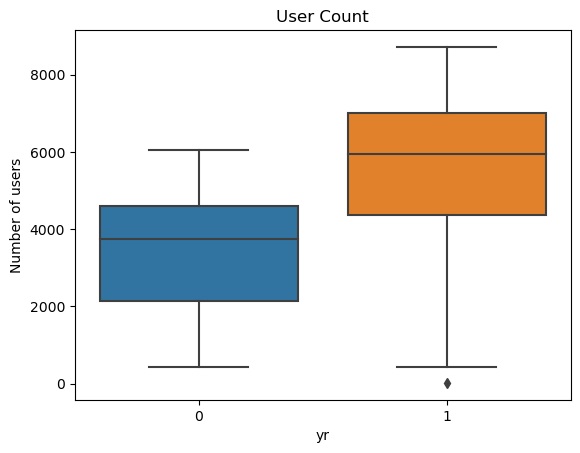

In [18]:
# Plotting the box plot of target variable across the 2 years
sns.boxplot(x='yr', y='cnt', data=df)
plt.title("User Count")
plt.ylabel("Number of users")
plt.show()

Inferences:

- The overall median number of users is around 4,500
- The number of users has increased in 2019 compared to 2018
- There are no major outliers in the number of users

## Bivariate Analysis

### Categorical Variable Analysis

#### Season and Weather

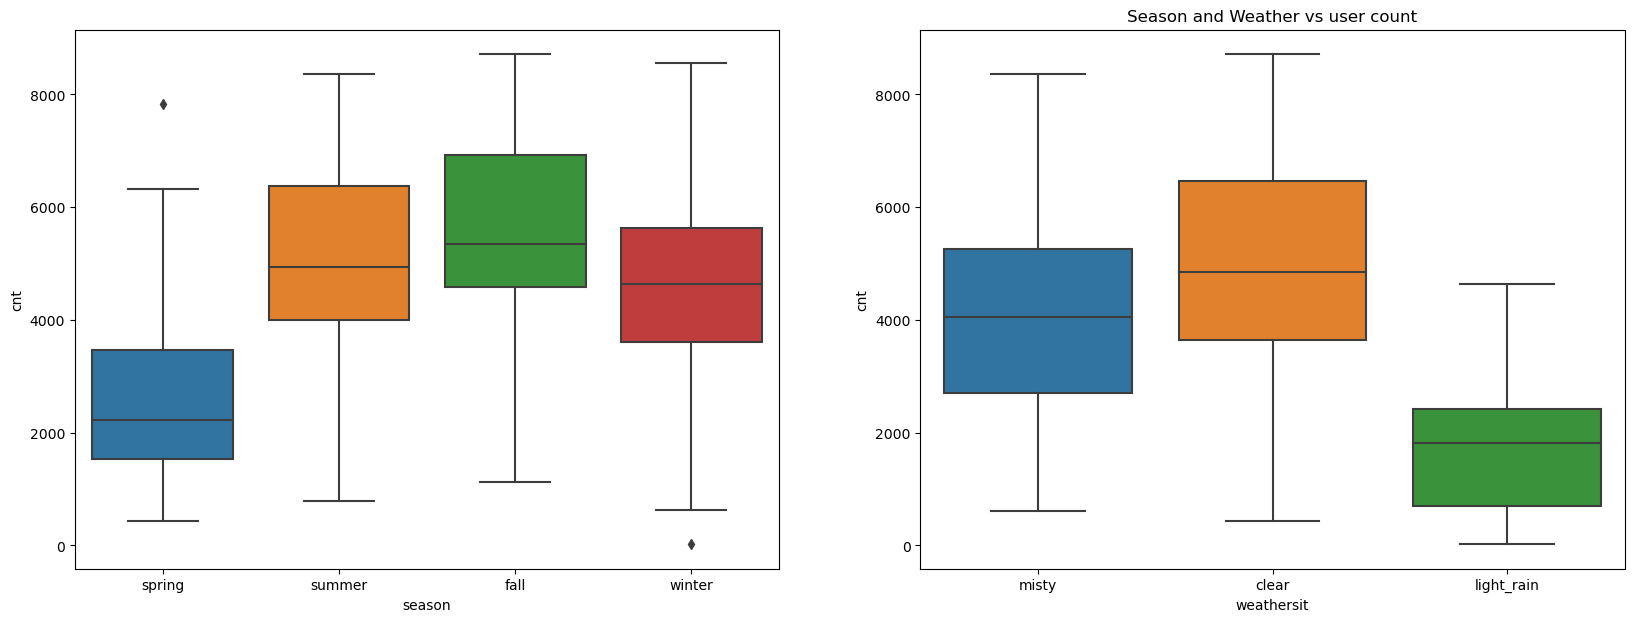

In [19]:
# Plotting box plots  for categorical variables
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.title("Season and Weather vs user count")
plt.show()

Inferences:

- From a season point of view, the median user count is highest in fall, followed by summer, winter and spring
- Considering weather, we see that user counts are generally higher in clear weather, followed by misty and light rain

#### Weekdays and months

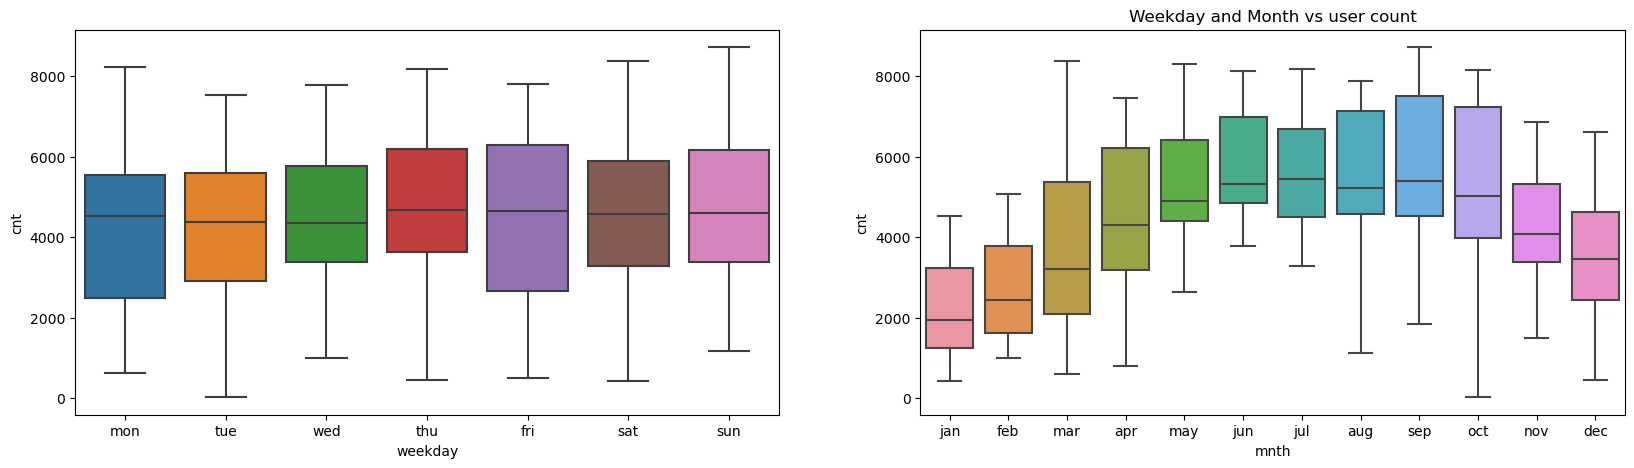

In [20]:
# Plotting box plots  for categorical variables
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.title("Weekday and Month vs user count")
plt.show()

Inferences:

- The number of users is roughly the same across all weekdays
- The number of users peaks in the June to September period and is the lowest in January

### Numerical Variable Analysis

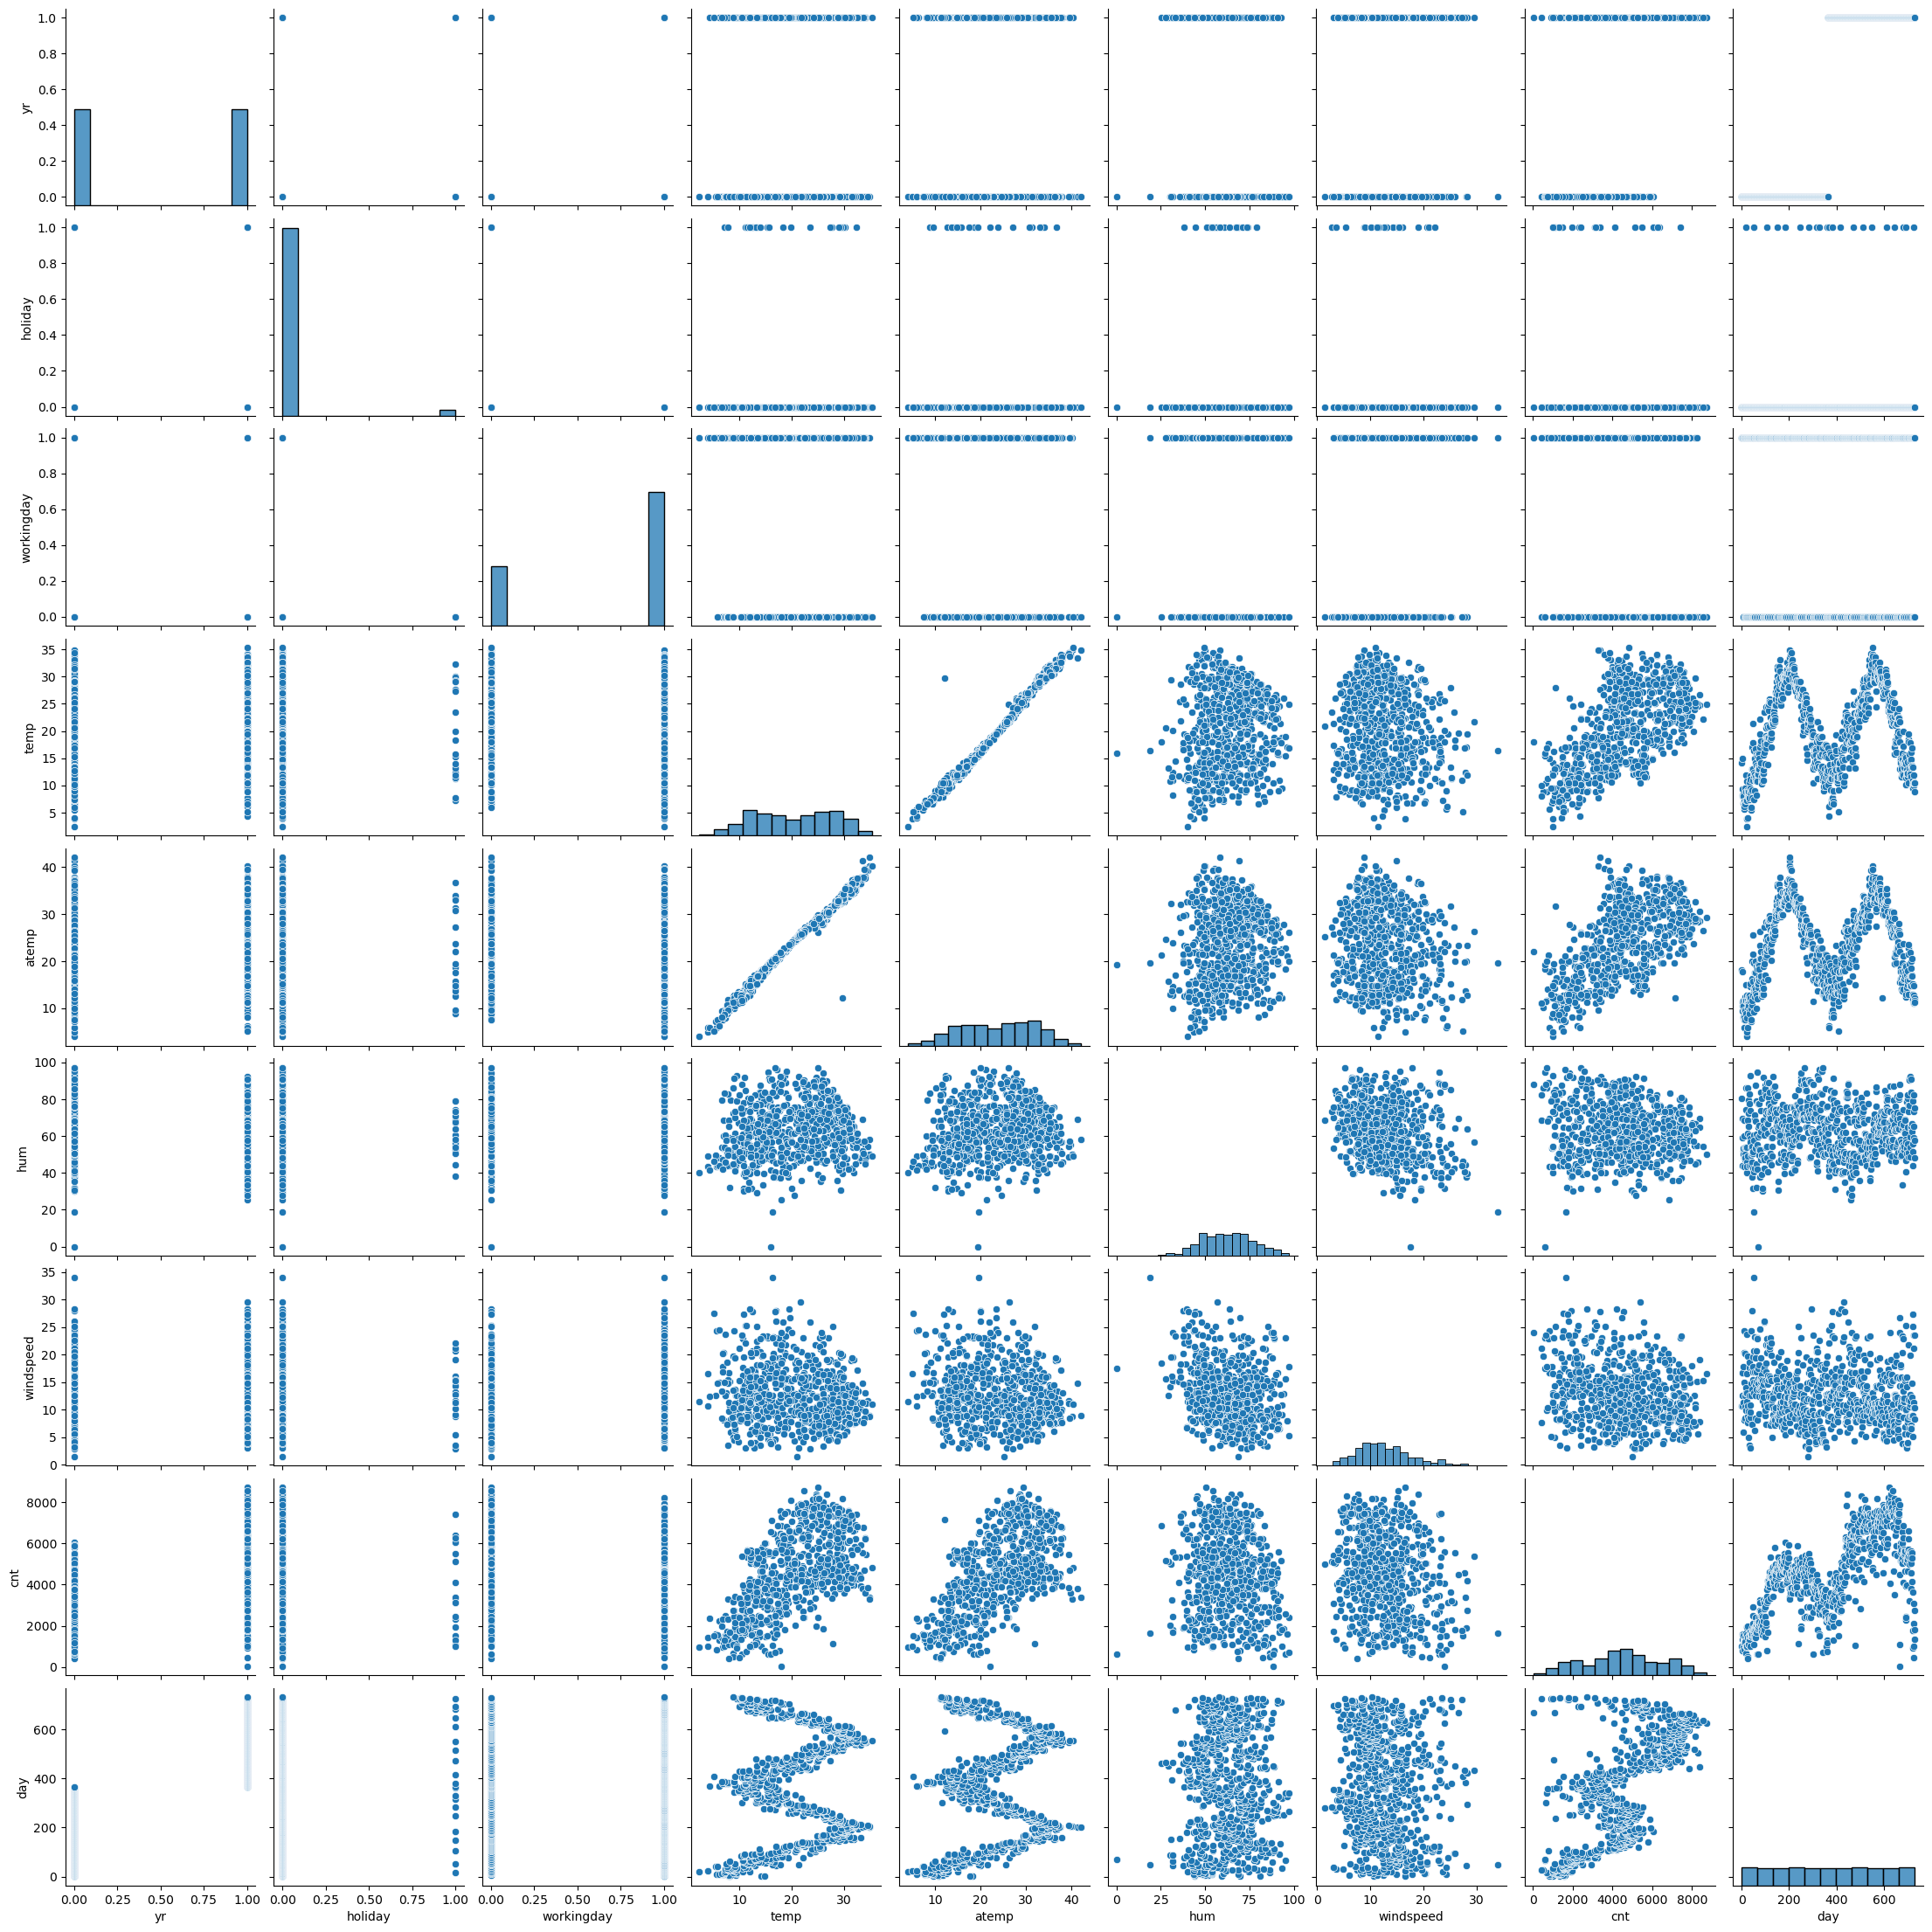

In [21]:
# Creating the pair plot for all numerical variables
sns.pairplot(df)
plt.show()

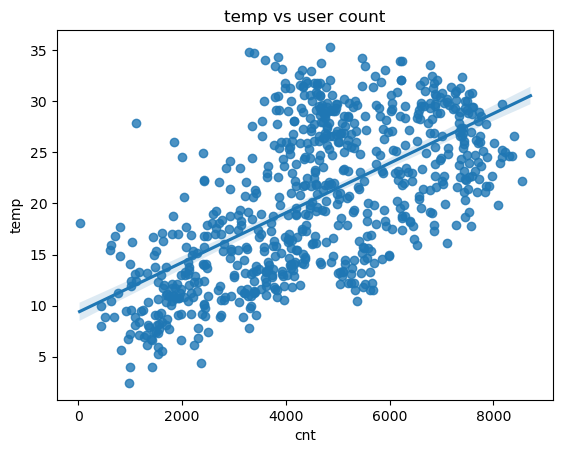

In [22]:
# Temp seems to have the highest correlation. Plotting the scatter graph for temp vs cnt
sns.regplot(x='cnt', y= 'temp', data = df)
plt.title("temp vs user count")
plt.show()

Inferences

- Temperature seems to be the only variable which has a visible linear correlation with the number of users

## Data preparation

### Creating dummy variables

#### Season

In [23]:
# Creating a temporary dataset to contain the dummy variables. We will also drop the first column as we need 3 columns to capture the 4 categories
season_temp = pd.get_dummies(df['season'], drop_first = True)

# Converting the temporary dataset to integer to show 0 or 1
season_temp=season_temp.astype(int)

# Checking the temporary dataset
season_temp.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
# Concatenating the temporary dataset to the main dataset
df = pd.concat([df, season_temp], axis = 1)

# Checking the new dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0


In [25]:
# dropping the season column
df.drop('season', axis=1, inplace=True)

# Checking the dataset again
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter
0,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0
2,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0
3,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0
4,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0


#### Weathersit

In [26]:
# Creating a temporary dataset to contain the dummy variables. We will also drop the first column as we need 3 columns to capture the 4 categories
weather_temp = pd.get_dummies(df['weathersit'], drop_first = True)

# Converting the temporary dataset to integer to show 0 or 1
weather_temp=weather_temp.astype(int)

# Checking the temporary dataset
weather_temp.head()

,light_rain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


- Only 2 columns were created as the dataset does not have any days with heavy rain

In [27]:
# Concatenating the temporary dataset to the main dataset
df = pd.concat([df, weather_temp], axis = 1)

# Checking the new dataset
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,light_rain,misty
0,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,1
1,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,1
2,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0
3,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0
4,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0


In [28]:
# dropping the weathersit column
df.drop('weathersit', axis=1, inplace=True)

# Checking the dataset again
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,light_rain,misty
0,0,jan,0,mon,1,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,1
1,0,jan,0,tue,1,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,1
2,0,jan,0,wed,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0
3,0,jan,0,thu,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0
4,0,jan,0,fri,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0


#### Month

In [29]:
# Creating a temporary dataset to contain the dummy variables. We will also drop the first column as we need 11 columns to capture the 12 categories
mnth_temp = pd.get_dummies(df['mnth'], drop_first = True)

# Converting the temporary dataset to integer to show 0 or 1
mnth_temp=mnth_temp.astype(int)

# Checking the temporary dataset
mnth_temp.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# Concatenating the temporary dataset to the main dataset
df = pd.concat([df, mnth_temp], axis = 1)

# Checking the new dataset
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,mon,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,tue,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,wed,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,thu,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,fri,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# dropping the mnth column
df.drop('mnth', axis=1, inplace=True)

# Checking the dataset again
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,mon,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tue,1,14.902598,17.68695,69.6087,16.652113,801,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wed,1,8.050924,9.47025,43.7273,16.636703,1349,3,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thu,1,8.200000,10.60610,59.0435,10.739832,1562,4,...,0,0,1,0,0,0,0,0,0,0
4,0,0,fri,1,9.305237,11.46350,43.6957,12.522300,1600,5,...,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [32]:
# Creating a temporary dataset to contain the dummy variables. We will also drop the first column as we need 6 columns to capture the 7 categories
weekday_temp = pd.get_dummies(df['weekday'], drop_first = True)

# Converting the temporary dataset to integer to show 0 or 1
weekday_temp=weekday_temp.astype(int)

# Checking the temporary dataset
weekday_temp.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [33]:
# Concatenating the temporary dataset to the main dataset
df = pd.concat([df, weekday_temp], axis = 1)

# Checking the new dataset
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,mon,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,tue,1,14.902598,17.68695,69.6087,16.652113,801,2,...,0,0,0,0,0,0,0,0,1,0
2,0,0,wed,1,8.050924,9.47025,43.7273,16.636703,1349,3,...,0,0,0,0,0,0,0,0,0,1
3,0,0,thu,1,8.200000,10.60610,59.0435,10.739832,1562,4,...,0,0,0,0,0,0,0,1,0,0
4,0,0,fri,1,9.305237,11.46350,43.6957,12.522300,1600,5,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# dropping the weekday column
df.drop('weekday', axis=1, inplace=True)

# Checking the dataset again
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,2,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,...,0,0,0,0,0,0,0,0,0,0


### Checking how the target variable is distributed over the days

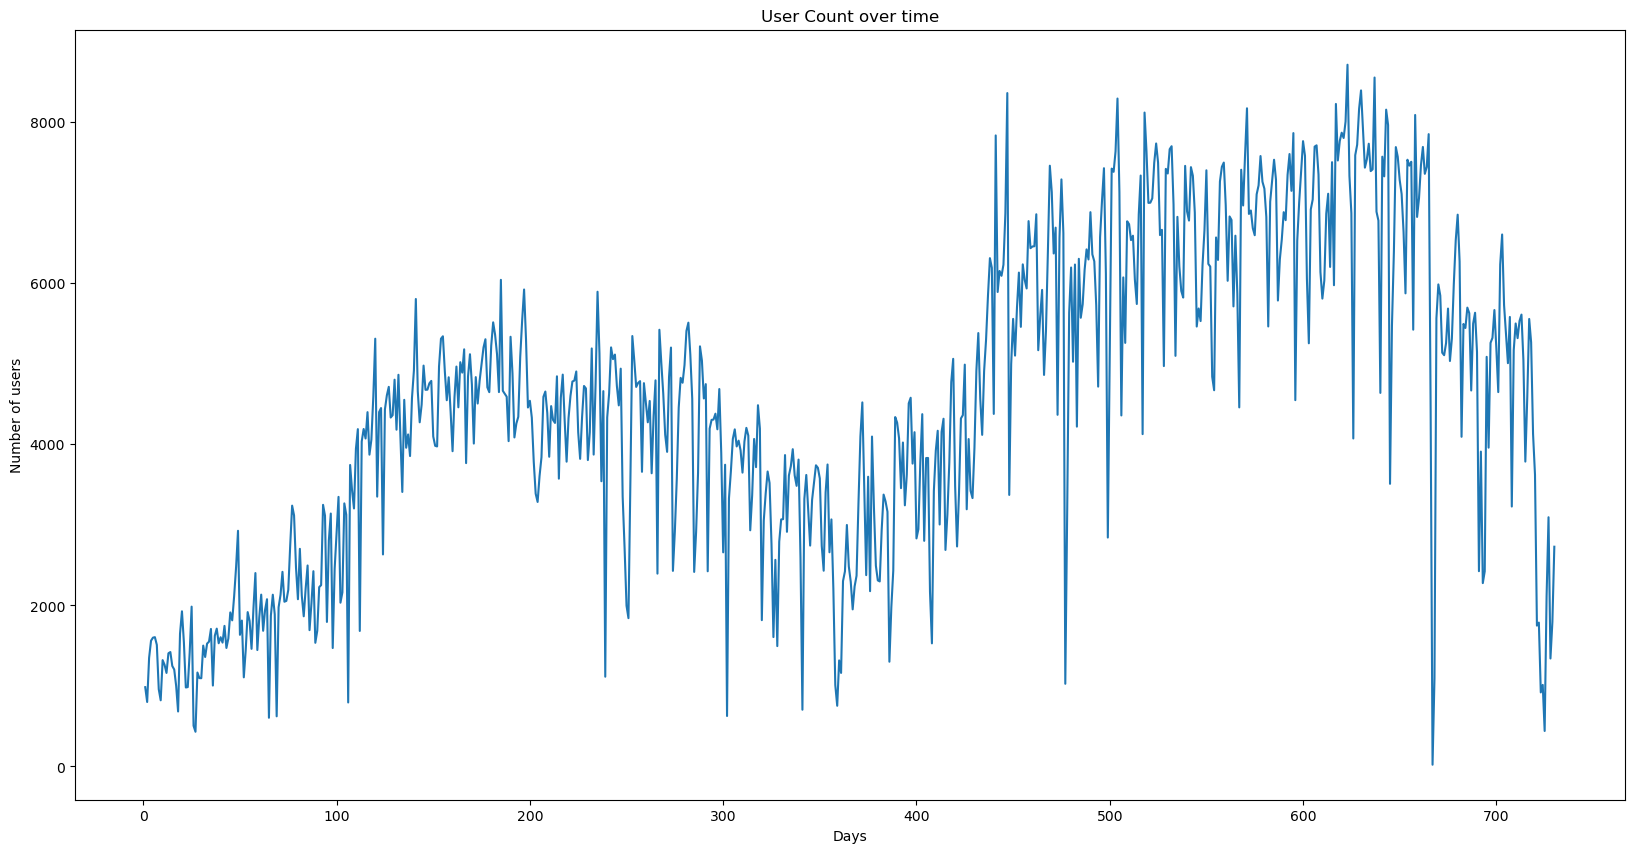

In [35]:
# Plotting a line graph of the target variable over days
plt.figure(figsize=(20, 10))
sns.lineplot(x='day', y='cnt', data=df)
plt.title('User Count over time')
plt.xlabel('Days')
plt.ylabel('Number of users')
plt.show()

In [36]:
# Dropping the day column as it may interfere with the predictor selection
df.drop('day', axis=1, inplace=True)

### Splitting the dataset into train and test sets

In [37]:
# Splitting the dataset into train and test sets with 80:20 ratio using random state as 10
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 10)

In [38]:
# Checking the training dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,0,...,0,0,0,0,0,0,0,0,1,0
172,0,0,1,30.066653,34.69145,70.7500,11.541554,4507,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,1,25.898347,29.51480,81.0000,15.667414,4274,0,1,...,1,0,0,0,0,0,0,0,0,1
237,0,0,0,28.700000,32.98665,76.1250,5.625488,4661,0,0,...,0,0,0,0,0,0,1,0,0,0
531,1,0,0,25.898347,29.73540,50.4167,11.166689,7702,0,1,...,0,0,0,0,0,0,1,0,0,0


### Creating Heatmap for Multivariate analysis

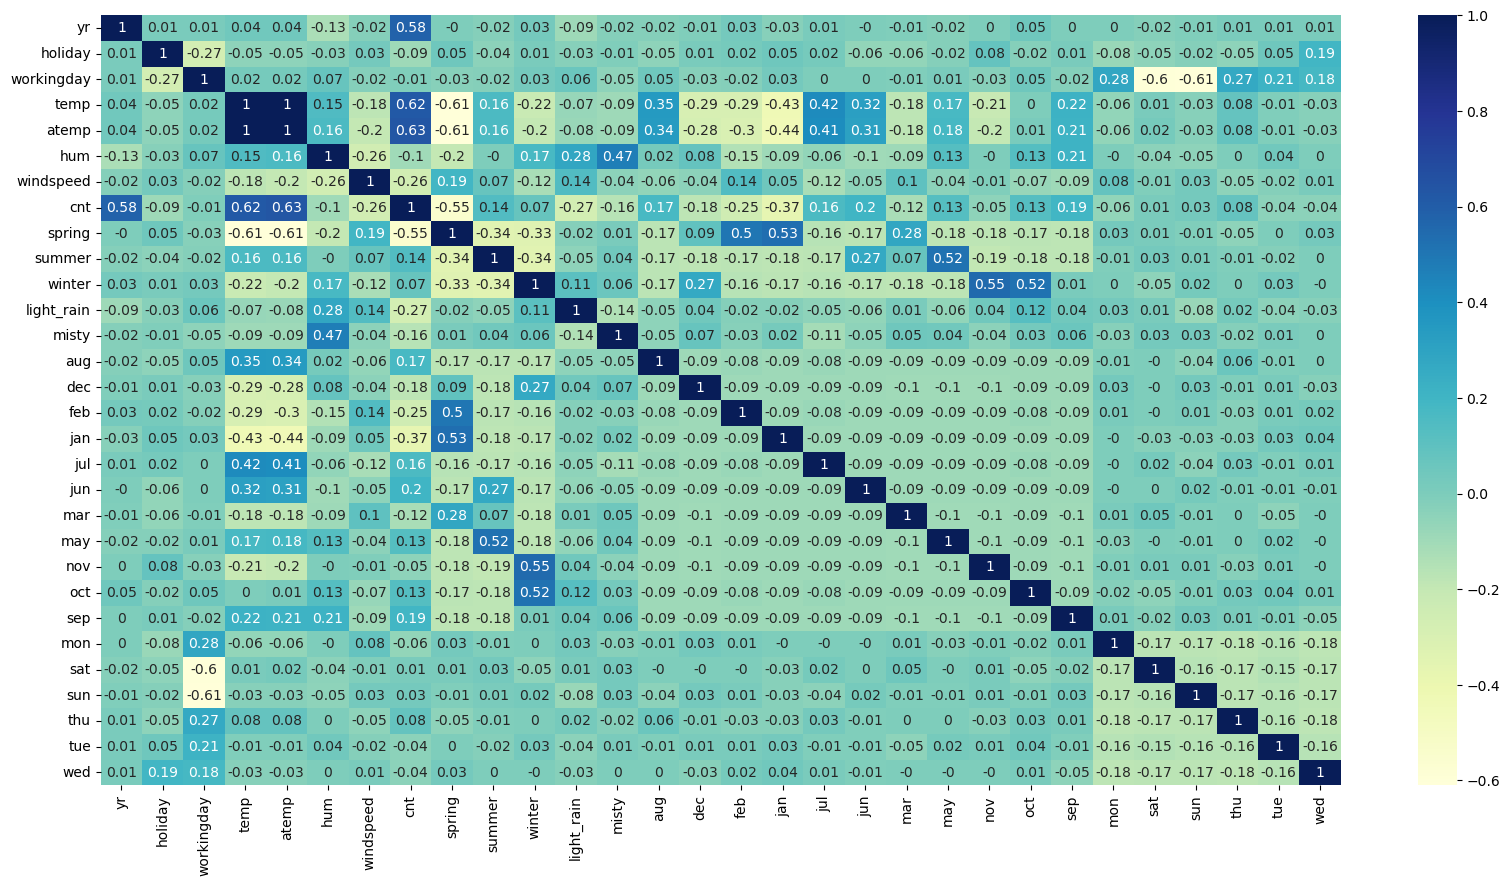

In [39]:
# Creating the heatmap for all numerical variables
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

Inferences:

- The target variable seems to have the highest correlations with year, temp and atemp features

### Rescaling the features based on Min-Max model

In [40]:
# Describing the training dataset before rescaling
df_train.cnt.describe()

count     584.000000
mean     4481.450342
std      1950.989488
min        22.000000
25%      3123.750000
50%      4496.500000
75%      5978.500000
max      8714.000000
Name: cnt, dtype: float64

In [41]:
# creating the scaler object
scaler = MinMaxScaler()

In [42]:
# Creating a temporary variable to store all column names which require scaling
scal_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Using fit transform to rescale the selected features
df_train[scal_vars] = scaler.fit_transform(df_train[scal_vars])

# Checking the dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
176,0,0,1,0.773634,0.733185,0.527849,0.148724,0.607800,0,0,...,0,0,0,0,0,0,0,0,1,0
172,0,0,1,0.840090,0.806955,0.727506,0.308966,0.515992,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,1,0.713409,0.671054,0.832905,0.435916,0.489185,0,1,...,1,0,0,0,0,0,0,0,0,1
237,0,0,0,0.798555,0.762199,0.782776,0.126931,0.533709,0,0,...,0,0,0,0,0,0,1,0,0,0
531,1,0,0,0.713409,0.676845,0.518424,0.297431,0.883571,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# Checking if all selected columns are rescaled as per Min-Max rule
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.493151,0.032534,0.691781,0.542347,0.518287,0.646984,0.343075,0.513052,0.248288,0.261986,...,0.089041,0.089041,0.080479,0.085616,0.145548,0.138699,0.142123,0.152397,0.128425,0.154110
std,0.500382,0.177566,0.462153,0.224823,0.210205,0.149899,0.159616,0.224458,0.432390,0.440092,...,0.285047,0.285047,0.272267,0.280037,0.352955,0.345928,0.349476,0.359714,0.334849,0.361363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352833,0.340357,0.533848,0.229498,0.356851,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.537404,0.525578,0.648671,0.317952,0.514784,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.694239,0.755407,0.431426,0.685285,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating the predictor and target datasets

#### Training Set

In [44]:
# Creating the target set
y_train = df_train.pop('cnt')

# Creating the predictor set
X_train = df_train

## Building the Model

### Using RFE to build the preliminary model with 12 features

In [45]:
# Creating a linear regression object
lm=LinearRegression()

# Fitting the training sets usng the regression object
lm.fit(X_train, y_train)

# Running RFE to select top 15 features
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [46]:
# Listing the features based on RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('misty', False, 2),
 ('aug', False, 11),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 10),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 12),
 ('tue', False, 7),
 ('wed', False, 9)]

In [47]:
# Getting all columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light_rain', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep'],
      dtype='object')

In [48]:
# Getting all columns not selected by RFE
dropcol = X_train.columns.difference(col)
dropcol

Index(['aug', 'jun', 'mar', 'may', 'misty', 'mon', 'oct', 'sat', 'summer',
       'sun', 'thu', 'tue', 'wed', 'workingday'],
      dtype='object')

### Building this model using statsmodel for detailed statistics

#### Model 1: From RFE

In [49]:
# Creating a new RFE dataset with above columns
X_train_rfe = X_train[col]

In [50]:
# Adding a constant to the predictor set
X_train_m1=sm.add_constant(X_train_rfe)

In [51]:
# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m1).fit()

In [52]:
# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.41e-212
Time:                        23:31:03   Log-Likelihood:                 574.83
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     568   BIC:                            -1048.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      0.031     13.971      0.000       0.367       0.487
yr             0.2304      0.008     29.809      0.000       0.215       0.246
holiday       -0.0695      0.022     -3.210      0.001      -0.112      -0.027
temp          -0.1588      0.217     -0.731      0.465      -0.586       0.268
atemp          0.6467      0.232      2.789      0.005       0.191       1.102
hum           -0.2805      0.029     -9.529      0.000      -0.338      -0.223
windspeed     -0.1776      0.027     -6.599      0.000      -0.230      -0.125
spring        -0.0949      0.017     -5.698      0.000      -0.128      -0.062
winter         0.0722      0.013      5.436      0.000       0.046       0.098
light_rain    -0.1756      0.023     -7.745      0.000      -0.220      -0.131
dec           -0.0594      0.017     -3.492      0.001      -0.093      -0.026
feb           -0.0449      0.020     -2.239      0.026      -0.084      -0.006
jan           -0.0570      0.020     -2.793      0.005      -0.097      -0.017
jul           -0.0750      0.017     -4.467      0.000      -0.108      -0.042
nov           -0.0633      0.018     -3.560      0.000      -0.098      -0.028
sep            0.0537      0.015      3.669      0.000       0.025       0.082
==============================================================================
Omnibus:                      100.314   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.252
Skew:                          -0.899   Prob(JB):                     1.84e-52
Kurtosis:                       5.561   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- We have a good model with 83.7% Rsquared
- The p(f-statistic) is very small, and hence the model fit is significant
- The p value for temp feature is very high. We need to check the VIF to decide further

#### Model 1: VIF Study

In [53]:
# Creating a VIF dataframe
vif = pd.DataFrame()

# Calculating VIF for all features
vif['Features'] = X_train_m1.columns
vif['VIF'] = [variance_inflation_factor(X_train_m1.values, i) for i in range(X_train_m1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,165.62
4,atemp,164.76
0,const,64.81
7,spring,3.60
8,winter,2.28
12,jan,2.23
11,feb,1.95
14,nov,1.78
10,dec,1.60
5,hum,1.35


- We can create the second model by dropping temp with the highest VIF

#### Model 2: Dropping temp

In [54]:
# Dropping the temp feature
X_train_m2=X_train_m1.drop('temp',axis=1)

In [55]:
# Rebuilding the model without atemp

# Adding Constant
X_train_m2lm=sm.add_constant(X_train_m2)

# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m2lm).fit()

# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.25e-213
Time:                        23:31:03   Log-Likelihood:                 574.56
No. Observations:                 584   AIC:                            -1119.
Df Residuals:                     569   BIC:                            -1054.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4282      0.030     14.057      0.000       0.368       0.488
yr             0.2305      0.008     29.831      0.000       0.215       0.246
holiday       -0.0706      0.022     -3.270      0.001      -0.113      -0.028
atemp          0.4790      0.033     14.494      0.000       0.414       0.544
hum           -0.2794      0.029     -9.508      0.000      -0.337      -0.222
windspeed     -0.1826      0.026     -7.017      0.000      -0.234      -0.131
spring        -0.0941      0.017     -5.664      0.000      -0.127      -0.061
winter         0.0734      0.013      5.579      0.000       0.048       0.099
light_rain    -0.1769      0.023     -7.830      0.000      -0.221      -0.132
dec           -0.0589      0.017     -3.467      0.001      -0.092      -0.026
feb           -0.0448      0.020     -2.235      0.026      -0.084      -0.005
jan           -0.0576      0.020     -2.823      0.005      -0.098      -0.018
jul           -0.0761      0.017     -4.547      0.000      -0.109      -0.043
nov           -0.0627      0.018     -3.533      0.000      -0.098      -0.028
sep            0.0520      0.014      3.600      0.000       0.024       0.080
==============================================================================
Omnibus:                       98.833   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.706
Skew:                          -0.890   Prob(JB):                     2.94e-51
Kurtosis:                       5.529   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- The model has an Rsquared value of 83.7%. The F-static has a very low p value, meaning that model fit is significant
- The feb feature has high p value

#### Model 2: VIF Study

In [56]:
# Creating a VIF dataframe
vif = pd.DataFrame()

# Calculating VIF for all features
vif['Features'] = X_train_m2lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2lm.values, i) for i in range(X_train_m2lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.53
6,spring,3.58
3,atemp,3.35
7,winter,2.24
11,jan,2.22
10,feb,1.95
13,nov,1.78
9,dec,1.60
4,hum,1.35
12,jul,1.33


- VIF values for all features are within 5 and hence acceptable
- Dropping feb in the next model due to high p value

#### Model 3: Dropping feb

In [57]:
# Dropping the feb feature
X_train_m3=X_train_m2.drop('feb',axis=1)

In [58]:
# Rebuilding the model without atemp

# Adding Constant
X_train_m3lm=sm.add_constant(X_train_m3)

# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m3lm).fit()

# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          9.75e-214
Time:                        23:31:03   Log-Likelihood:                 572.01
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     570   BIC:                            -1055.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4189      0.030     13.833      0.000       0.359       0.478
yr             0.2300      0.008     29.679      0.000       0.215       0.245
holiday       -0.0714      0.022     -3.298      0.001      -0.114      -0.029
atemp          0.4930      0.033     15.145      0.000       0.429       0.557
hum           -0.2789      0.029     -9.459      0.000      -0.337      -0.221
windspeed     -0.1818      0.026     -6.965      0.000      -0.233      -0.131
spring        -0.1129      0.014     -7.845      0.000      -0.141      -0.085
winter         0.0712      0.013      5.403      0.000       0.045       0.097
light_rain    -0.1756      0.023     -7.750      0.000      -0.220      -0.131
dec           -0.0461      0.016     -2.874      0.004      -0.078      -0.015
jan           -0.0328      0.017     -1.910      0.057      -0.067       0.001
jul           -0.0786      0.017     -4.691      0.000      -0.112      -0.046
nov           -0.0569      0.018     -3.227      0.001      -0.091      -0.022
sep            0.0523      0.015      3.604      0.000       0.024       0.081
==============================================================================
Omnibus:                       88.372   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.239
Skew:                          -0.812   Prob(JB):                     1.21e-44
Kurtosis:                       5.382   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- The model has an Rsquared value of 83.6%. The F-static has a very low p value, meaning that model fit is significant
- The jan feature has high p value

#### Model 3: VIF Study

In [59]:
    # Creating a VIF dataframe
    vif = pd.DataFrame()

    # Calculating VIF for all features
    vif['Features'] = X_train_m3lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_m3lm.values, i) for i in range(X_train_m3lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,63.31
3,atemp,3.23
6,spring,2.67
7,winter,2.22
12,nov,1.74
10,jan,1.57
9,dec,1.42
4,hum,1.35
11,jul,1.32
5,windspeed,1.20


- VIF values for all features are within 5 and hence acceptable
- Dropping jan in the next model due to high p value

#### Model 4: Dropping jan

In [60]:
# Dropping the jan feature
X_train_m4=X_train_m3.drop('jan',axis=1)

In [61]:
# Rebuilding the model without atemp

# Adding Constant
X_train_m4lm=sm.add_constant(X_train_m4)

# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m4lm).fit()

# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     240.4
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          3.76e-214
Time:                        23:31:04   Log-Likelihood:                 570.14
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     571   BIC:                            -1057.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4086      0.030     13.681      0.000       0.350       0.467
yr             0.2302      0.008     29.630      0.000       0.215       0.245
holiday       -0.0727      0.022     -3.349      0.001      -0.115      -0.030
atemp          0.5105      0.031     16.302      0.000       0.449       0.572
hum           -0.2824      0.029     -9.572      0.000      -0.340      -0.224
windspeed     -0.1778      0.026     -6.817      0.000      -0.229      -0.127
spring        -0.1194      0.014     -8.522      0.000      -0.147      -0.092
winter         0.0715      0.013      5.418      0.000       0.046       0.097
light_rain    -0.1739      0.023     -7.664      0.000      -0.219      -0.129
dec           -0.0384      0.016     -2.468      0.014      -0.069      -0.008
jul           -0.0817      0.017     -4.891      0.000      -0.115      -0.049
nov           -0.0528      0.018     -3.012      0.003      -0.087      -0.018
sep            0.0522      0.015      3.590      0.000       0.024       0.081
==============================================================================
Omnibus:                       84.842   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.017
Skew:                          -0.789   Prob(JB):                     5.47e-42
Kurtosis:                       5.306   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- The model has an Rsquared value of 83.3%. The F-static has a very low p value, meaning that model fit is significant
- The dec feature has high p value

#### Model 4: VIF Study

In [62]:
# Creating a VIF dataframe
vif = pd.DataFrame()

# Calculating VIF for all features
vif['Features'] = X_train_m4lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4lm.values, i) for i in range(X_train_m4lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.30
3,atemp,2.97
6,spring,2.52
7,winter,2.22
11,nov,1.71
4,hum,1.34
9,dec,1.33
10,jul,1.31
5,windspeed,1.19
8,light_rain,1.17


- VIF values for all features are within 5 and hence acceptable
- Dropping dec in the next model due to high p value

#### Model 5: Dropping dec

In [63]:
# Dropping the dec feature
X_train_m5=X_train_m4.drop('dec',axis=1)

In [64]:
# Rebuilding the model without atemp

# Adding Constant
X_train_m5lm=sm.add_constant(X_train_m5)

# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m5lm).fit()

# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     259.4
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          4.67e-214
Time:                        23:31:04   Log-Likelihood:                 567.04
No. Observations:                 584   AIC:                            -1110.
Df Residuals:                     572   BIC:                            -1058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4005      0.030     13.432      0.000       0.342       0.459
yr             0.2303      0.008     29.512      0.000       0.215       0.246
holiday       -0.0742      0.022     -3.408      0.001      -0.117      -0.031
atemp          0.5270      0.031     17.147      0.000       0.467       0.587
hum           -0.2880      0.030     -9.747      0.000      -0.346      -0.230
windspeed     -0.1757      0.026     -6.711      0.000      -0.227      -0.124
spring        -0.1187      0.014     -8.437      0.000      -0.146      -0.091
winter         0.0611      0.013      4.862      0.000       0.036       0.086
light_rain    -0.1725      0.023     -7.569      0.000      -0.217      -0.128
jul           -0.0844      0.017     -5.040      0.000      -0.117      -0.052
nov           -0.0377      0.017     -2.285      0.023      -0.070      -0.005
sep            0.0556      0.015      3.823      0.000       0.027       0.084
==============================================================================
Omnibus:                       79.300   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.544
Skew:                          -0.764   Prob(JB):                     6.85e-37
Kurtosis:                       5.123   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- The model has an Rsquared value of 83.3%. The F-static has a very low p value, meaning that model fit is significant
- The nov feature has high p value

#### Model 5: VIF Study

In [65]:
# Creating a VIF dataframe
vif = pd.DataFrame()

# Calculating VIF for all features
vif['Features'] = X_train_m5lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5lm.values, i) for i in range(X_train_m5lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.56
3,atemp,2.84
6,spring,2.52
7,winter,2.00
10,nov,1.51
4,hum,1.33
9,jul,1.30
5,windspeed,1.19
8,light_rain,1.17
11,sep,1.13


- VIF values for all features are within 5 and hence acceptable
- Dropping nov in the next model due to high p value

#### Model 6: Dropping nov

In [66]:
# Dropping the nov feature
X_train_m6=X_train_m5.drop('nov',axis=1)

In [67]:
# Rebuilding the model without atemp

# Adding Constant
X_train_m6lm=sm.add_constant(X_train_m6)

# Using the linear regression object to create the model
lm=sm.OLS(y_train,X_train_m6lm).fit()

# Getting the detailed statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     282.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          3.61e-214
Time:                        23:31:04   Log-Likelihood:                 564.39
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     573   BIC:                            -1059.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3919      0.030     13.201      0.000       0.334       0.450
yr             0.2305      0.008     29.438      0.000       0.215       0.246
holiday       -0.0785      0.022     -3.605      0.000      -0.121      -0.036
atemp          0.5367      0.031     17.569      0.000       0.477       0.597
hum           -0.2841      0.030     -9.596      0.000      -0.342      -0.226
windspeed     -0.1775      0.026     -6.757      0.000      -0.229      -0.126
spring        -0.1145      0.014     -8.179      0.000      -0.142      -0.087
winter         0.0493      0.011      4.288      0.000       0.027       0.072
light_rain    -0.1717      0.023     -7.509      0.000      -0.217      -0.127
jul           -0.0857      0.017     -5.098      0.000      -0.119      -0.053
sep            0.0584      0.015      4.018      0.000       0.030       0.087
==============================================================================
Omnibus:                       76.766   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.256
Skew:                          -0.751   Prob(JB):                     7.12e-35
Kurtosis:                       5.051   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences:

- The model has an Rsquared value of 83.2%. The F-static has a very low p value, meaning that model fit is significant
- The adjusted Rsquared value is also very close to the Rsquared value, and hence this model is considered robust
- All features have low p-values and hence are significant

#### Model 6: VIF Study

In [68]:
# Creating a VIF dataframe
vif = pd.DataFrame()

# Calculating VIF for all features
vif['Features'] = X_train_m6lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_m6lm.values, i) for i in range(X_train_m6lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.60
3,atemp,2.78
6,spring,2.47
7,winter,1.66
4,hum,1.33
9,jul,1.30
5,windspeed,1.19
8,light_rain,1.17
10,sep,1.12
1,yr,1.04


- VIF values for all features are within 5 and hence acceptable
- This is a good model to predict the number of users. Proceeding to Residual analysis

### Residual Analysis of training data

In [69]:
# Creating the predicted y dataset from model 2
y_train_pred = lm.predict(X_train_m6lm)

Text(0.5, 0, 'Errors')

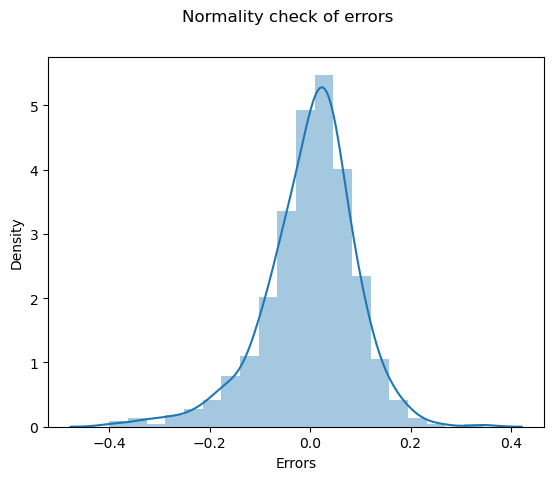

In [70]:
# Plotting the histogram of the error terms to verify if it follows normal distribution
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot(res, bins = 20)
fig.suptitle('Normality check of errors')                  
plt.xlabel('Errors') 

- The residuals approximately follow a normal distribution curve with a mean of 0.
- This indicates that the model is well-suited for making the required predictions.

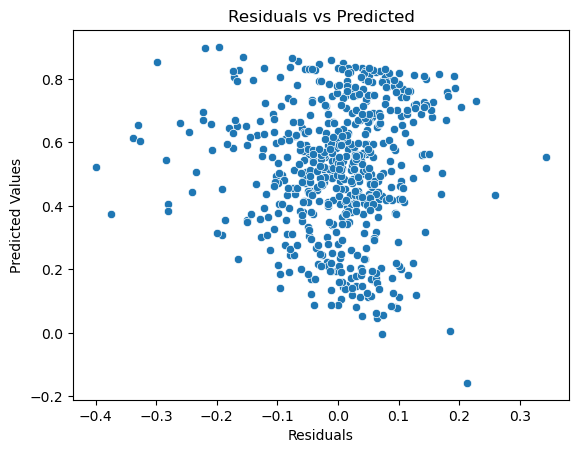

In [71]:
# Checking for homoscedasticity
sns.scatterplot(x=res, y=y_train_pred)
plt.title('Residuals vs Predicted')
plt. xlabel('Residuals')
plt. ylabel('Predicted Values')
plt.show()

- As we can see there is no visible relationship between the residuals and predicted values, proving the model is homoscedastic
- This also proves that our developed model is good

## Making predictions using Model 6

### Rescaling the test set

In [72]:
# Scaling the test set using the same columns as earlier
df_test[scal_vars] = scaler.transform(df_test[scal_vars])

# Checking the scaling on the test dataset
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
566,1,0,0,0.668758,0.618044,0.889889,0.393568,0.510469,0,0,...,0,0,0,0,0,0,1,0,0,0
374,1,0,1,0.310971,0.314713,0.664804,0.340487,0.411413,1,0,...,0,0,0,0,0,0,0,1,0,0
181,0,0,0,0.826591,0.752261,0.407455,0.165370,0.614358,0,0,...,0,0,0,0,0,0,1,0,0,0
529,1,0,1,0.734175,0.715797,0.585689,0.476922,0.844570,0,1,...,0,0,0,0,0,0,0,0,0,0
233,0,0,1,0.788172,0.734005,0.483290,0.524373,0.544869,0,0,...,0,0,0,0,0,0,0,0,0,1


### Creating the predictor and target datasets

In [73]:
# Creating the target set
y_test = df_test.pop('cnt')

# Creating the predictor set
X_test = df_test

### Predicting based on Model 6

In [74]:
# Adding constant to the predictor test dataframe
X_test_m6 = sm.add_constant(X_test)

In [75]:
# Dropping the columns which were removed in Model 2
X_test_m6.drop(dropcol, axis=1, inplace=True)
X_test_m6.drop(['feb','temp','jan','dec','nov'], axis=1, inplace=True)

# Checking the test dataset
X_test_m6.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,light_rain,jul,sep
566,1.0,1,0,0.618044,0.889889,0.393568,0,0,1,1,0
374,1.0,1,0,0.314713,0.664804,0.340487,1,0,0,0,0
181,1.0,0,0,0.752261,0.407455,0.165370,0,0,0,1,0
529,1.0,1,0,0.715797,0.585689,0.476922,0,0,0,0,0
233,1.0,0,0,0.734005,0.483290,0.524373,0,0,0,0,0


In [76]:
# Making the predictions based on Model 6
y_test_pred=lm.predict(X_test_m6)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

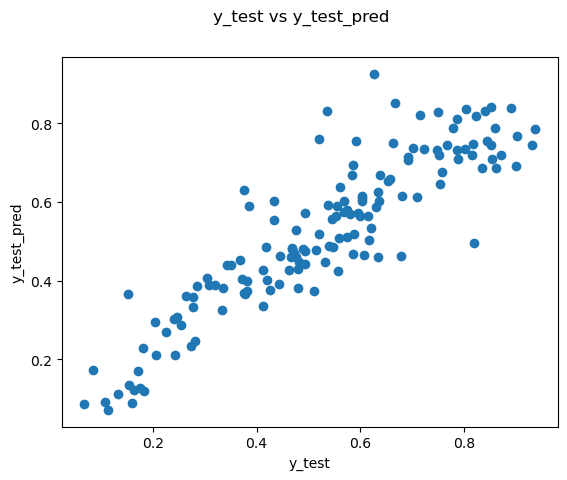

In [77]:
# Plotting the graph between actual and predicted values
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')      

### Calculating the Rsquared for actual and predicted target variable in test set

In [78]:
# Calculating the R squared value for the actual and predicted values 
r2_score(y_test, y_test_pred)

0.8017608595454787

In [79]:
# Calculating the rounded R squared value for the actual and predicted values
round(r2_score(y_true=y_test, y_pred=y_test_pred)*100,2)

80.18

### Final inferences and Model for target variable

In [80]:
# Listing the coefficients for the final model
lm.params

const         0.391914
yr            0.230510
holiday      -0.078511
atemp         0.536705
hum          -0.284054
windspeed    -0.177521
spring       -0.114504
winter        0.049278
light_rain   -0.171749
jul          -0.085669
sep           0.058395
dtype: float64

**Final Inferences**

- Since the R squared for the test set is 80.2% and training set is 83.2%, which is within the 5% window. This is a good model to predict the target values
- The formula for the user count is as below

**cnt = 0.231 x yr - 0.079 x holiday + 0.537 x atemp - 0.284 x hum - 0.178 x windspeed - 0.115 x spring + 0.049 x winter - 0.172 x light_rain - 0.086 x jul + 0.058 x sep**

The variables affect the dependent variable in the below way:

a.	Year – The number of users is growing year on year, and hence each consecutive year has a positive effect on the number of users.

b.	Month – The model shows a small negative effect of July month and a smaller positive correlation with September month. This may mark the start and end of the rainy periods when most users would not be using bikes

c.	Holiday – Holidays seem to have a negative effect on the dependent variable. This may be due to the fact that many users use bikes to commute to work.

d.	Season – The spring season seems to have a negative effect on the dependent variable while winter has a low positive effect on the dependent variable.

e.	Weather – Light rain has a negative effect on the dependent variable. The highest number of users are found on days with clear weather.

f. Humidity - This feature shows the humidity for each day. This feature negatively effects the number of users, as higher humidity usually deters users from riding bikes.

g. Temperature - atemp - This feature is closely related to the temp variable. This makes sense as most users would like to use bikes as the temperature is higher.

h. Windspeed - This feature has a negative affect on the number of users, as is evident from our model coefficients.
